<a href="https://colab.research.google.com/github/PRyuC/Pascal_INFO5502_Summer2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [27]:
from google.colab import files          
upload = files.upload()

Saving portfolio_data.csv to portfolio_data.csv


In [28]:
### You code here:


# importing all necessary modules
import pandas as pd                           
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

In [29]:
#creating dataframe and printing information

train_df = pd.read_csv('train_luc.csv')     
print("\nNumber of samples (rows):",train_df.shape[0],"\nNumber of features (columns):",train_df.shape[1],"\n")

train_df.head()


Number of samples (rows): 9174 
Number of features (columns): 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
# more info

train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [31]:
# creating month_of_year functions based on tutorial hour_of_day function

def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
train_df['hour'] = train_df['datetime'].map(hour_of_day)

def month_of_year(dt):                                     
  return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").month
train_df['month'] = train_df['datetime'].map(month_of_year)
 
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


Text(0.5, 1.0, 'Measured bike use over 2 years')

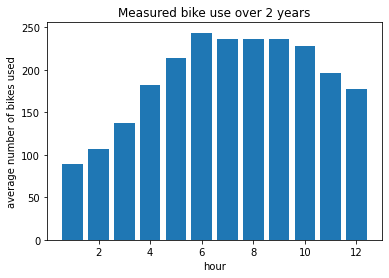

In [32]:
# visualizing month instead of hour, seems somewhat useful but less than hour

month = np.unique(train_df['month'])

month_mean = {}
for m in month:
    temp_df = train_df.loc[train_df['month'] == m]
    month_mean[m] = temp_df['count'].mean()


plt.bar(month,[month_mean[m] for m in month])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

In [33]:
# one-hot encoding weather column using get_dummies to create new features

weather_dummies = pd.get_dummies(train_df['weather'], prefix='weather') # prefix added at beginning of name

In [34]:
# adding to dataframe
train_df = pd.concat([train_df, weather_dummies], axis=1)

# dropping original weather column
train_df = train_df.drop(['weather'], axis=1)

train_df.head()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,9.84,14.395,81,0.0,3,13,16,0,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,9.02,13.635,80,0.0,8,32,40,1,1,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,9.02,13.635,80,0.0,5,27,32,2,1,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,9.84,14.395,75,0.0,3,10,13,3,1,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,9.84,14.395,75,0.0,0,1,1,4,1,1,0,0,0


In [35]:
# picking more features
cols = ['season', 'holiday', 'workingday', 'hour', 'month', 'weather_1', 'weather_2', 'weather_3', 'weather_4']

In [36]:
# importing models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [37]:
# instantiating the models

# modelDT = DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=40, 
#                                 min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter='random') # trying some hypertuning
# modelSV = svm.LinearSVR()
# modelLR = LinearRegression()

# creating a models for casual and registered with RandomForest and KNeighbors

casualKN = KNeighborsRegressor(n_neighbors=5)  # selecting 5 neighbors
registKN = KNeighborsRegressor(n_neighbors=5)

casualRF = RandomForestRegressor(n_estimators=20) # selecting 20 forests
registRF = RandomForestRegressor(n_estimators=20)

In [38]:
# splitting train and test, considering casual and registered independently
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df[cols], train_df['casual'], test_size= 0.25, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(train_df[cols], train_df['registered'], test_size= 0.25, random_state=0)

X_train.shape, y_train.shape  # looking at the shapes

((6880, 9), (6880,))

In [39]:
X_test.shape, y_test.shape

((2294, 9), (2294,))

In [40]:
# scaling to standardize all numbers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # instantianting the scaler
scaler.fit(X_train)        # fitting on X_train
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns) #transforming it back to dataframe
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns) #same with X_test

#doing the same with X2_train
scaler.fit(X2_train)
X2_train= pd.DataFrame(scaler.transform(X2_train), index=X2_train.index, columns=X2_train.columns) 
X2_test = pd.DataFrame(scaler.transform(X2_test), index=X2_test.index, columns=X2_test.columns)

In [41]:
# choosing and fitting the models
# going with RandomForest and KN for separating casual and registered
casualRF.fit(X_train, y_train)
registRF.fit(X2_train, y2_train)

casualKN.fit(X_train, y_train)
registKN.fit(X2_train, y2_train)

KNeighborsRegressor()

In [42]:
# predicting

pred_casualKN = casualKN.predict(X_test)
pred_registKN = registKN.predict(X2_test)

pred_casualRF = casualRF.predict(X_test)
pred_registRF = registRF.predict(X2_test)

In [43]:
# comparing the models through cross validation

from sklearn.model_selection import cross_val_score

# - before since score is neg_mse, cv=10 for 10 fold cross validation
scores_casualKN = -cross_val_score(casualKN, X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)
scores_registKN = -cross_val_score(registKN, X2_test, y2_test, scoring = 'neg_mean_squared_error', cv=10)

scores_casualRF = -cross_val_score(casualRF, X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)
scores_registRF = -cross_val_score(registRF, X2_test, y2_test, scoring = 'neg_mean_squared_error', cv=10)


# averaging scores of sqrt mean squared error

avg_score_casualKN = np.sqrt(scores_casualKN).mean()
avg_score_registKN = np.sqrt(scores_registKN).mean()

avg_score_casualRF = np.sqrt(scores_casualRF).mean()
avg_score_registRF = np.sqrt(scores_registRF).mean()


# printing casual and registered rmse avg
# models similar for casual, RF slightly better for registered
print('RF:',avg_score_casualRF, avg_score_registRF)
print('KN:',avg_score_casualKN, avg_score_registKN)

RF: 25.718523273832893 77.27077403615178
KN: 24.542910663573203 88.27599211673838


In [44]:
# creating test dataframe
test_df = pd.read_csv('test_luc.csv', header=0)


# adding new features to test data set
test_df['hour'] = test_df['datetime'].map(hour_of_day)
test_df['month'] = test_df['datetime'].map(month_of_year)

weather_dummies_2 = pd.get_dummies(test_df['weather'], prefix='weather')
test_df = pd.concat([test_df, weather_dummies_2], axis=1)
test_df = test_df.drop(['weather'], axis=1)
test_df['weather_4'] = 0                        # no weather 4 in test_luc so adding all 0 manually

# fiting the selected model (RF) to the full training set
casualRF.fit(train_df[cols], train_df['casual'].values.ravel())
registRF.fit(train_df[cols], train_df['registered'].values.ravel())

# applying model to test data
preds_casual = casualRF.predict(test_df[cols])
preds_regist = registRF.predict(test_df[cols])

# adding prediction column
preds = preds_casual + preds_regist
test_df['count'] = preds

# saving as csv
test_df = test_df[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv")

Prediction complete. Saved as my_prediction.csv


In [45]:
# comparing prediction to ground truth 

from sklearn.metrics import mean_squared_error

ground_truth = pd.read_csv('sample_prediction.csv') # creating ground_truth dataframe
rms = np.sqrt(mean_squared_error(ground_truth['count'],preds)) # comparing it to preds and calculating root mean squared error
print("RMS error:",rms)

RMS error: 102.90905865664593


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [46]:
### You code here:

# INCOMPLETE - tried a few things but ran out of time to complete

# importing libraries again in case
import pandas as pd                           
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

# creating dataframe
data = pd.read_csv('portfolio_data.csv')

# only keeping BTC
data = data[['BTC']]